<a href="https://colab.research.google.com/github/shimazarghami/DeepNN/blob/main/DNN_Session%201%262%20Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#DL404_Session 1&2 Exercise 1
import numpy as np
def cwithMSE(x,W,b):
  y = x @ W + b
  print(y)
  target = 10
  print(target)
  loss = np.mean((y-target)**2)
  print(loss)

x = np.array([[1,2]])
W = np.array([[2],[3]])
b = np.array([1])
cwithMSE(x,W,b)

[[9]]
10
1.0


Epoch 0, loss = 218.9166
Epoch 20, loss = 1.1332
Epoch 40, loss = 1.1230
Epoch 60, loss = 1.1148
Epoch 80, loss = 1.1080
Epoch 100, loss = 1.1025
Epoch 120, loss = 1.0980
Epoch 140, loss = 1.0943
Epoch 160, loss = 1.0913
Epoch 180, loss = 1.0888


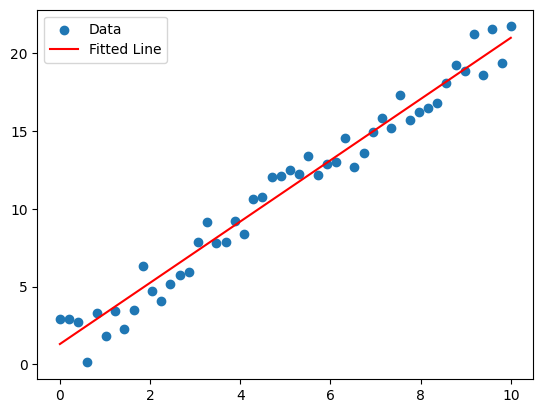

In [11]:
#DL404_Session 1&2 Exercise 2
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)
X = torch.linspace(0, 10, 50).unsqueeze(1)
y = 2 * X + 1 + torch.randn(X.size()) * 1.0
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
lr = 0.01
epochs = 200

for epoch in range(epochs):

    y_pred = w * X + b

    loss = ((y_pred - y)**2).mean()

    loss.backward()

    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, loss = {loss.item():.4f}")

pred_line = (w * X + b).detach()
plt.scatter(X, y, label="Data")
plt.plot(X, pred_line, 'r', label="Fitted Line")
plt.legend()
plt.show()



Learned weight: 3.0815210342407227
Learned bias: 1.4945286512374878


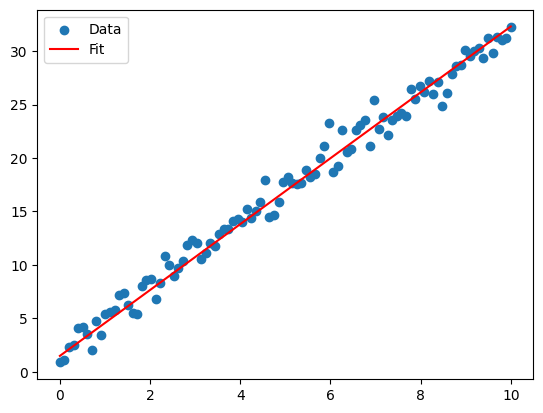

In [14]:
#DL404_Session 1&2 Exercise 3
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(0)

x = torch.linspace(0, 10, 100).unsqueeze(1)
y = 3 * x + 2 + torch.randn_like(x)

model = nn.Linear(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

for epoch in range(200):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()

print("Learned weight:", model.weight.item())
print("Learned bias:", model.bias.item())

plt.scatter(x.detach(), y.detach(), label="Data")
plt.plot(x.detach(), y_pred.detach(), color='red', label="Fit")
plt.legend()
plt.show()


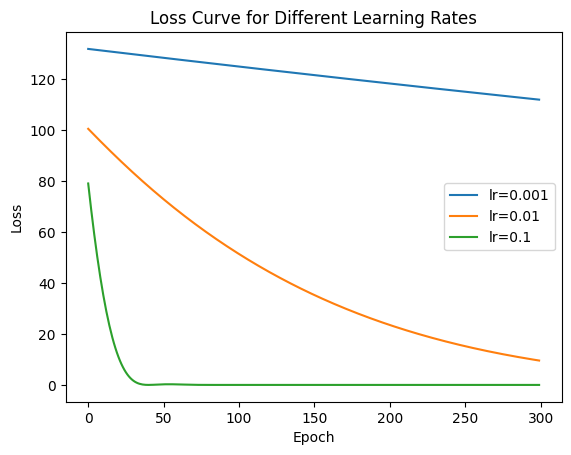

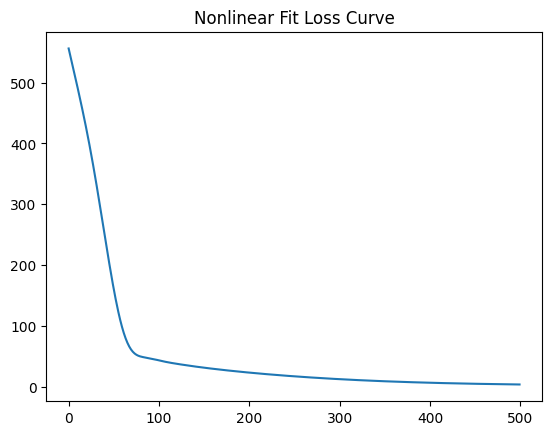

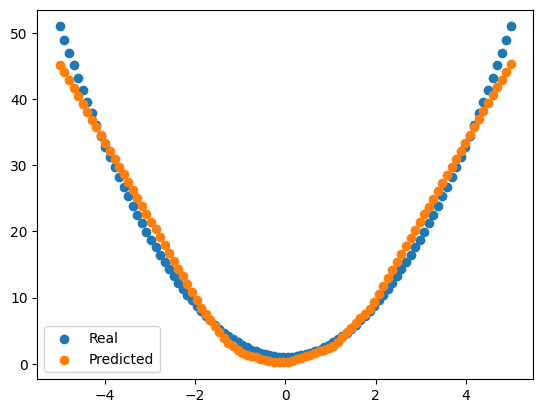

In [15]:
#DL404_Session 1&2 Exercise 4
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

torch.manual_seed(0)

x = torch.linspace(-5, 5, 100).unsqueeze(1)
y = 3 * x + 2
model = nn.Linear(1, 1)   # y = wx + b
criterion = nn.MSELoss()
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    model = nn.Linear(1, 1)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    losses = []

    for epoch in range(300):
        optimizer.zero_grad()

        y_pred = model(x)
        loss = criterion(y_pred, y)

        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    plt.plot(losses, label=f"lr={lr}")

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve for Different Learning Rates")
plt.show()

model = nn.Sequential(
    nn.Linear(1, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

y2 = 2 * x**2 + 1  # تابع غیرخطی
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

losses = []
for epoch in  range(500):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y2)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plt.plot(losses)
plt.title("Nonlinear Fit Loss Curve")
plt.show()

# Plot prediction vs real
plt.scatter(x, y2, label="Real")
plt.scatter(x, model(x).detach(), label="Predicted")
plt.legend()
plt.show()
